# Data Science test case part 2

### Task: Create a prediction of how much it transships (total of load & discharge activities) per cargo type. 

In [14]:
import pandas as pd
import numpy as np

data=pd.read_csv('/Users/abc/Desktop/wb-data-science-test/VesselData.csv')

data.head()


,eta,ata,atd,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,...,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,2017-09-22 00:00:00+00,109290.0,5,0,0,0,0,90173,...,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,2017-10-01 00:00:00+00,67737.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,43600.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,9231.0,3,0,0,0,0,0,...,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504


In [2]:
data.iloc[:,5:22]

,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,0,0,0,0,90173,0,0,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,0,0,0,0,0,0,0,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,0,0,0,0,0,0,0,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,0,0,0,0,0,0,0,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,0,0,0,0,0,0,0,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,0,0,0,0,0,0,0,0,Stevedore_64,NaN,2017-11-02 00:00:00+00,2017-11-03 00:00:00+00,ARRIVAL,5,19,f,5681
8204,0,0,0,0,0,0,0,0,"Stevedore_110,Stevedore_57,Stevedore_99,Steved...",NaN,2017-11-04 00:00:00+00,2017-11-05 00:00:00+00,SHIFT,391,102,f,4843
8205,0,0,0,0,0,0,3537,3051,"Stevedore_89,Stevedore_79,Stevedore_75,Stevedo...",NaN,2017-11-07 00:00:00+00,2017-11-10 00:00:00+00,SHIFT,1043,19,f,3115
8206,0,0,0,0,0,0,0,0,Stevedore_46,NaN,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,ARRIVAL,54,71,f,4623


In [3]:
data.shape

(8208, 22)

In [4]:
data.columns

Index(['eta', 'ata', 'atd', 'vesseldwt', 'vesseltype', 'discharge1', 'load1',
       'discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4',
       'stevedorenames', 'hasnohamis', 'earliesteta', 'latesteta',
       'traveltype', 'previousportid', 'nextportid', 'isremarkable',
       'vesselid'],
      dtype='object')

## Data Preparation

### Drop the virables that might create noises to the model accuracy

In [5]:
# Only need actual arrival and departure time, the 'eta' estimated time is not helpful.
data.drop('eta',inplace=True, axis=1)



In [6]:
# Handling missing values

data.isnull().sum()

ata                  0
atd                  0
vesseldwt            2
vesseltype           0
discharge1           0
load1                0
discharge2           0
load2                0
discharge3           0
load3                0
discharge4           0
load4                0
stevedorenames       2
hasnohamis        8208
earliesteta          0
latesteta            0
traveltype           0
previousportid       0
nextportid           0
isremarkable         0
vesselid             0
dtype: int64

In [7]:
# drop hasnohamis as it is full of null values

data.drop('hasnohamis',inplace=True, axis=1)

In [8]:
# Rest of other null values, just drop
data.dropna(inplace=True)

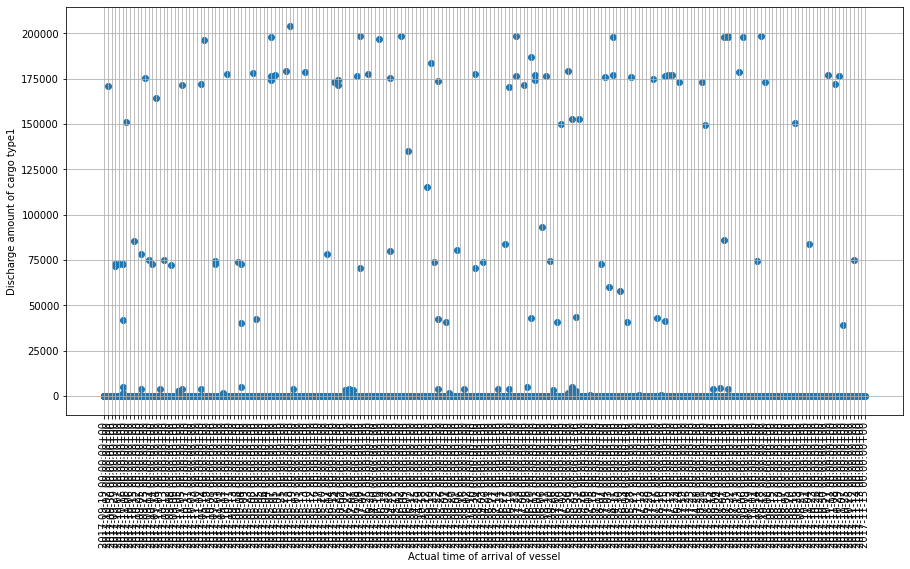

In [36]:
plt.figure(figsize=[15, 7.5]) 
plt.scatter(data['ata'], data['discharge1'])
plt.ylabel('Discharge amount of cargo type1')
plt.xlabel('Actual time of arrival of vessel')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Our next step is to decompose the time series and evaluate the patterns in the data.

In [9]:

import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings

# Setup
warnings.filterwarnings("ignore")


## Modelling the Data 

#### To model our data, we should look at a few assumptions.First, I'll plot the lag_plot to detect any autocorrelation.

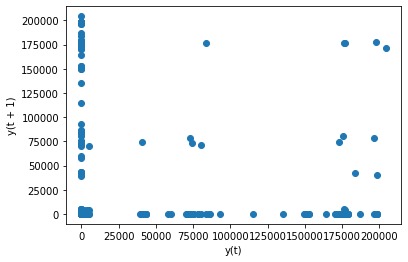

In [21]:
lag_plot(data['discharge1'])
plt.show()

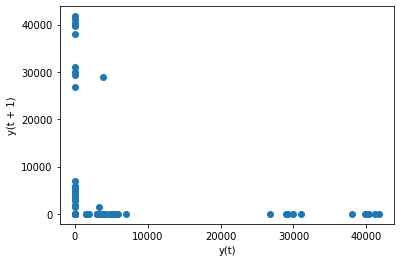

In [23]:
lag_plot(data['load1'])
plt.show()

In [ ]:
'''
It shows that there is no autocorrelation, the series is not linearly related to a lagged version of itself.
So we can continue to use it for forecasting.
'''

#### The next step will be to test both variables for stationarity

In [25]:
# Ho: discharge1 is not stationary
# Ha: discharge2 is stationary

if adfuller(data['discharge1'])[1] < 0.05:
    print("We can reject the null hypothesis with a 95% confidence level.")
else:
    print("We can't reject the null hypothesis.")


# Ho: load1 is not stationary
# Ha: load1 is stationary

if adfuller(data['load1'])[1] < 0.05:
    print("We can reject the null hypothesis with a 95% confidence level.")
else:
    print("We can't reject the null hypothesis.")

We can reject the null hypothesis with a 95% confidence level.
We can reject the null hypothesis with a 95% confidence level.


#### Finally, I'll create an ARMA model for discharge1

In [38]:
from statsmodels.tsa.arima_model import ARMA
# ARMA of order (p,q)
# p: order of the autoregressive model (AR).
# q: order of the moving average model (MA).


# Train and test set
index = data.shape[0] - 1000   
train = data['discharge1'][:index] 
test = data['discharge1'][index:]      # using the last 1000 entries of data as the test set
print(f"The number of samples in train is {train.shape[0]} and the number of samples in test is {test.shape[0]}.")

# Model
model = ARMA(train, order=(2,1))
arma = model.fit(disp=False)

# Predictions
predictions = arma.predict(test.index[0], test.index[-1])

# evaluation
from statsmodels.tools.eval_measures import rmse
rmse(test, predictions)


The number of samples in train is 7208 and the number of samples in test is 1000.


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.